In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from math import sqrt

import DataAid
import DataImporter
import Neros

In [18]:
# Collect the data from each of the folders
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
littleDataGalaxies = DataAid.GetGalaxyData("data/little-data-things/data/")
lcmGalaxies = DataAid.GetGalaxyData("data/LCMFits/data/")
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")
mcGaughMW = DataAid.GetGalaxyData("data/McGaugh/")
# Get the galaxies we want from each source
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])
MWMcGaugh = np.array(mcGaughMW['MW_lumMcGaugh'])

# chi squared function
def chiSquared(observed, expected, error):
    chiSquared = 0
    
    for i in range(len(observed)):
        chiSquared = chiSquared + (((observed[i] - expected[i])**2) / (error[i]**2))
        
    return chiSquared / len(observed)

# Fit function
def simple(independents, alpha, vLumFreeParam, phiZero):
    # Parse out data for the galaxy
    rad,vLum = independents
    # Apply the vLum free param to the data
    vLum = vLum*vLumFreeParam
    # Calc vLCM with alpha free param
    vLcm = Neros.vLcm(rad, MW_vLum_interp_func(rad), vLum, phiZero)
    # Calc and return vNeros
    return Neros.vNeros(vLum, vLcm, alpha)

## Create the Milky Way interpolation function

In [19]:
MW_rad_XueSofue = MWXueSofue[:,0]
MW_vLum_XueSofue = MWXueSofue[:,1]
MW_rad_McGaugh = MWMcGaugh[:,0]
MW_vLum_McGaugh = MWMcGaugh[:,1]

# Change these to change MW model used for fitting
MW_rad = MW_rad_McGaugh
MW_vLum = MW_vLum_McGaugh
 
# Interpolation function
MW_vLum_interp_func = interp1d(MW_rad, MW_vLum, kind='cubic')

## Running VNeros on every galaxy
We calculate vNeros for each galaxy and then plot the ratio between vNeros and the galaxy's vObs

galaxyName is: ddo47_rotmas_input_velocities
chiSquare is: 8505.805041209256
fittedAlpha is: -14040.117630563218, 
fittedVLumFreeParam is: 0.8943227073714647
MW_Phi is: [1.00113193e-07 2.71799603e-07 4.14253500e-07 5.28460070e-07
 6.17990437e-07 6.95971646e-07 7.61661714e-07 8.17869209e-07
 8.65084134e-07 9.09755956e-07 9.50892977e-07 9.87909334e-07
 1.02544856e-06 1.06269997e-06 1.09752726e-06 1.13175281e-06
 1.16414269e-06 1.19461253e-06 1.22619999e-06 1.25695243e-06
 1.28496602e-06 1.31268565e-06 1.33895533e-06 1.36396260e-06
 1.38738659e-06 1.41193337e-06 1.43646169e-06 1.45993851e-06
 1.48423822e-06 1.50754500e-06 1.52877668e-06 1.55014974e-06
 1.57063553e-06 1.58932841e-06]
Other_Phi is: [1.08668056e-09 4.39648860e-09 1.04930165e-08 1.91974060e-08
 2.99732807e-08 4.44483150e-08 6.37251965e-08 8.91677216e-08
 1.20220188e-07 1.59408925e-07 2.04147128e-07 2.52469512e-07
 3.10179060e-07 3.75940293e-07 4.45759979e-07 5.24137265e-07
 6.06146934e-07 6.87479525e-07 7.75080583e-07 8.64653

galaxyName is: haro36_rotmas_input_velocities
chiSquare is: 0.21554466986119364
fittedAlpha is: 26366.746026494802, 
fittedVLumFreeParam is: 1.022486780127711
MW_Phi is: [1.26766114e-07 3.38777185e-07 4.99566178e-07 6.17760031e-07
 7.13333438e-07 7.88041170e-07 8.53235929e-07 9.09175675e-07
 9.62574578e-07 1.01449817e-06]
Other_Phi is: [2.28631111e-10 8.41842959e-10 1.75032730e-09 2.70938976e-09
 3.64026113e-09 4.41199349e-09 5.03061594e-09 5.49931194e-09
 5.88209632e-09 6.19892284e-09]
--------------------------
galaxyName is: ddo133_rotmas_input_velocities
chiSquare is: 21.626127924289452
fittedAlpha is: 30809.047045403197, 
fittedVLumFreeParam is: 1.4326849911073456
MW_Phi is: [8.13089179e-08 2.38482634e-07 3.62133243e-07 4.65280273e-07
 5.56855315e-07 6.30582833e-07 6.94167348e-07 7.52413033e-07
 8.00763340e-07 8.43710269e-07 8.84531592e-07 9.20085997e-07
 9.53294484e-07 9.86323468e-07 1.01627665e-06 1.04560129e-06
 1.07640413e-06 1.10534615e-06 1.13320214e-06]
Other_Phi is: [1.952

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


galaxyName is: ddo50_rotmas_input_velocities
chiSquare is: inf
fittedAlpha is: 558.5148191811243, 
fittedVLumFreeParam is: 1.0411864704587415
MW_Phi is: [5.48767319e-08 1.53060625e-07 2.51325742e-07 3.31090378e-07
 4.08343368e-07 4.71471688e-07 5.33232414e-07 5.84205401e-07
 6.34514991e-07 6.76377438e-07 7.18014517e-07 7.52929891e-07
 7.87931915e-07 8.20111553e-07 8.47419708e-07 8.75128887e-07
 8.98936098e-07 9.23527079e-07 9.45010905e-07 9.67452719e-07
 9.87210141e-07 1.00800787e-06 1.02651897e-06 1.04629589e-06
 1.06420596e-06 1.08366586e-06 1.10311907e-06 1.12090379e-06
 1.14001908e-06 1.15699389e-06 1.17475720e-06 1.19048370e-06
 1.20730374e-06 1.22257777e-06 1.23918541e-06 1.25437937e-06
 1.27087892e-06 1.28584990e-06 1.30188957e-06 1.31751882e-06
 1.33143488e-06 1.34618025e-06 1.35933542e-06 1.37331777e-06
 1.38579645e-06 1.39903554e-06 1.41087780e-06 1.42364468e-06
 1.43534367e-06 1.44814643e-06 1.45989983e-06 1.47271197e-06
 1.48549973e-06 1.49721677e-06 1.51003033e-06 1.521772

ValueError: A value in x_new is below the interpolation range.

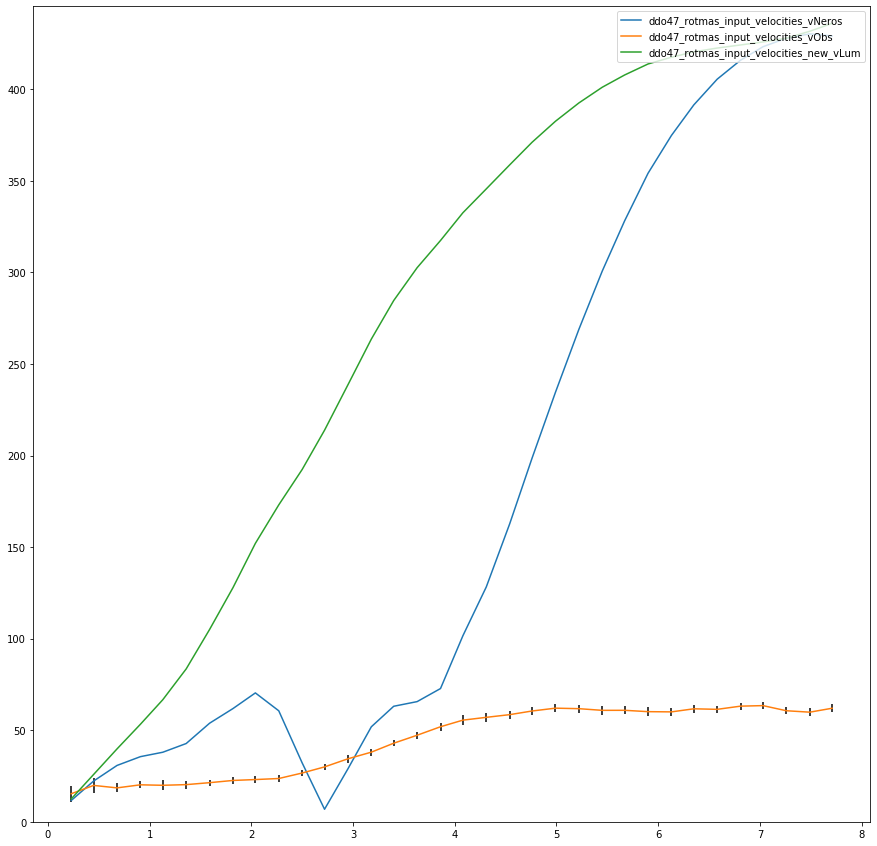

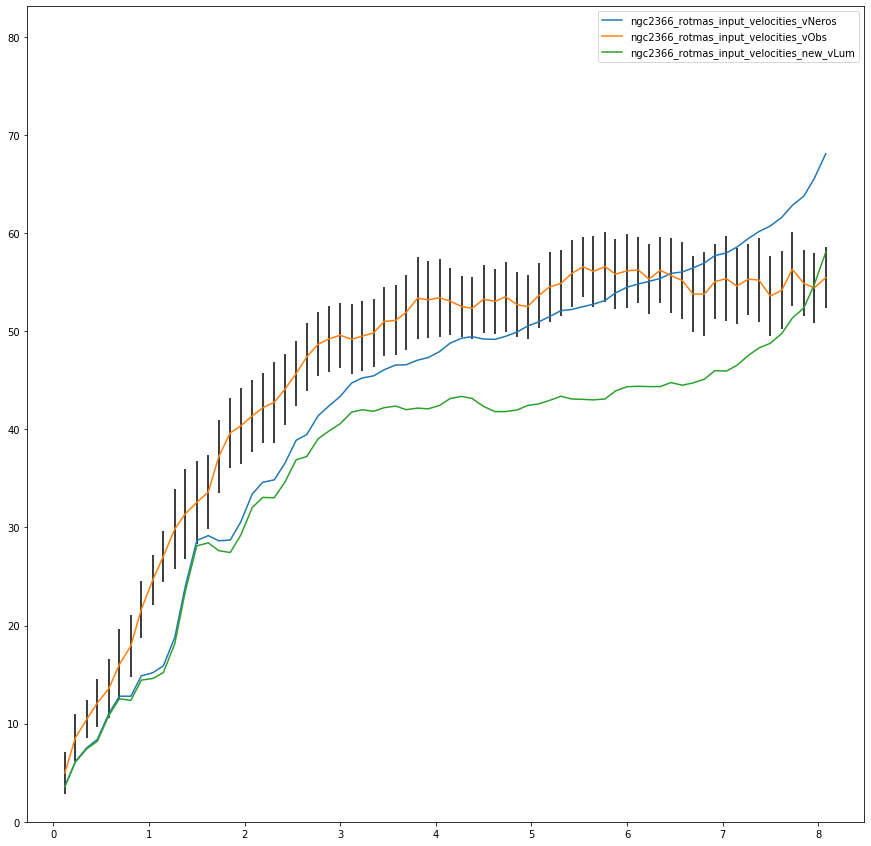

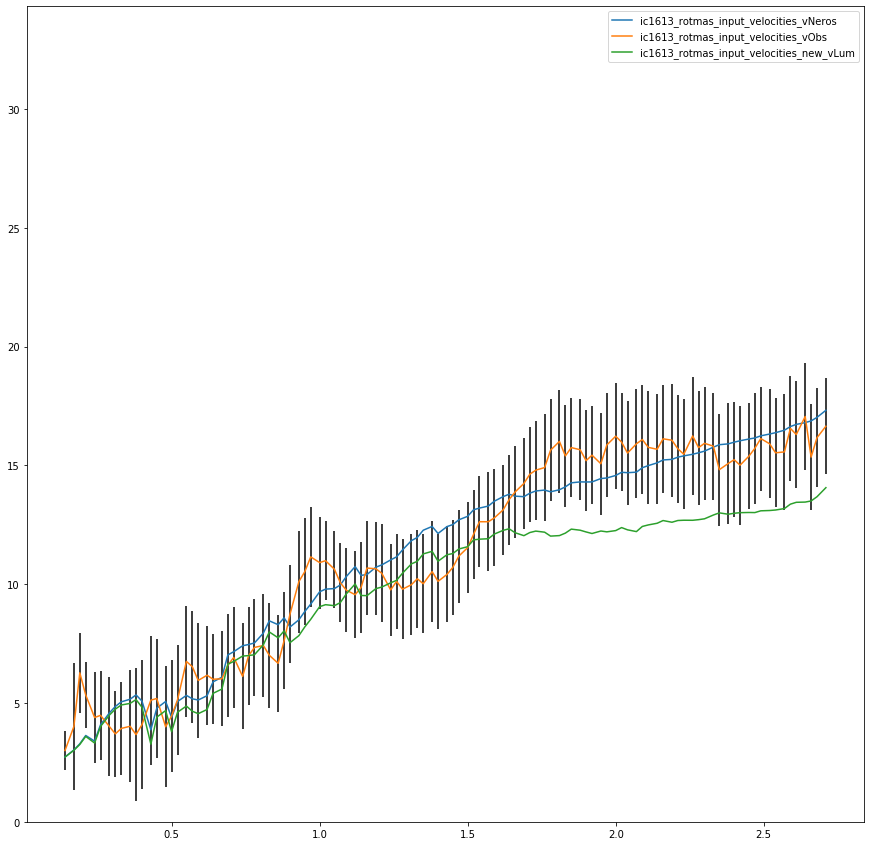

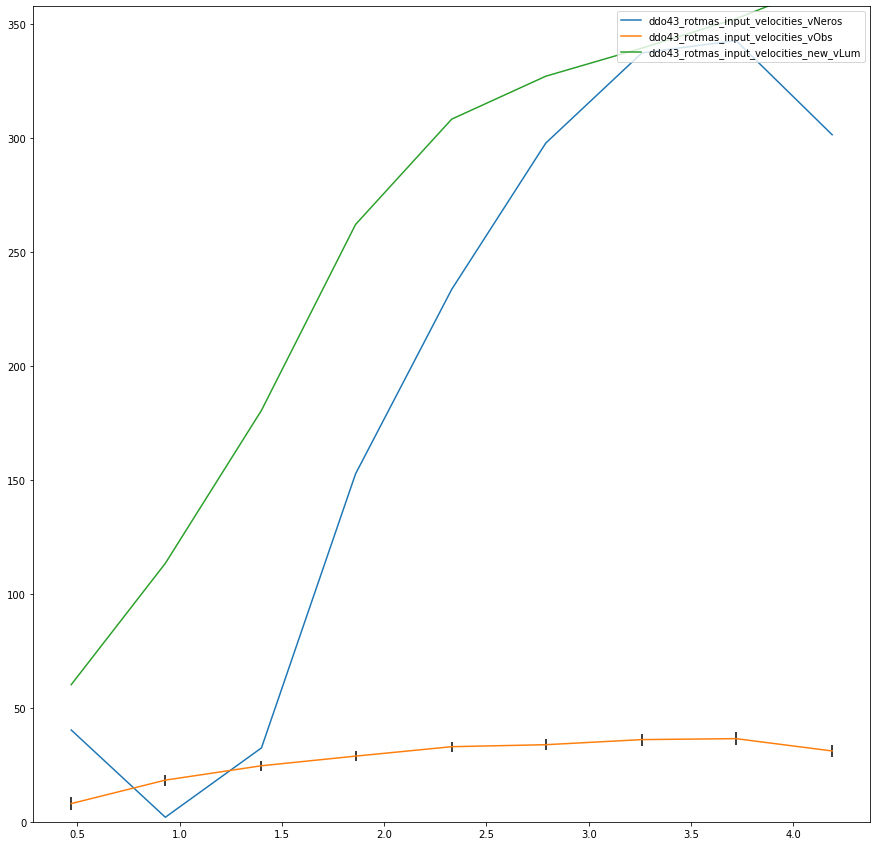

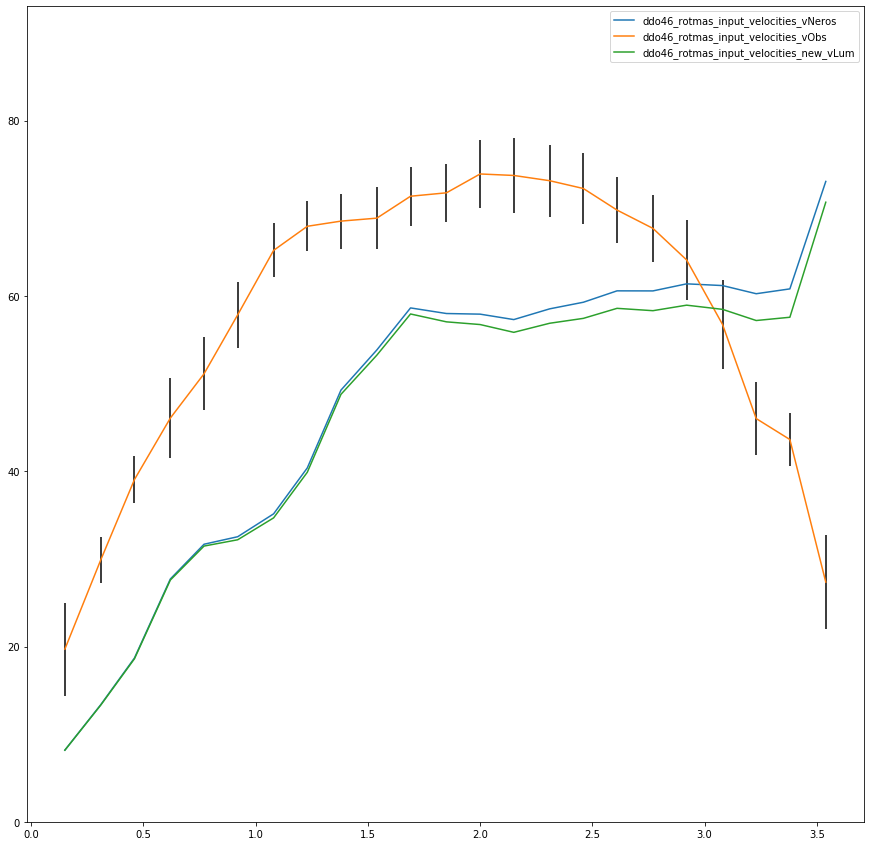

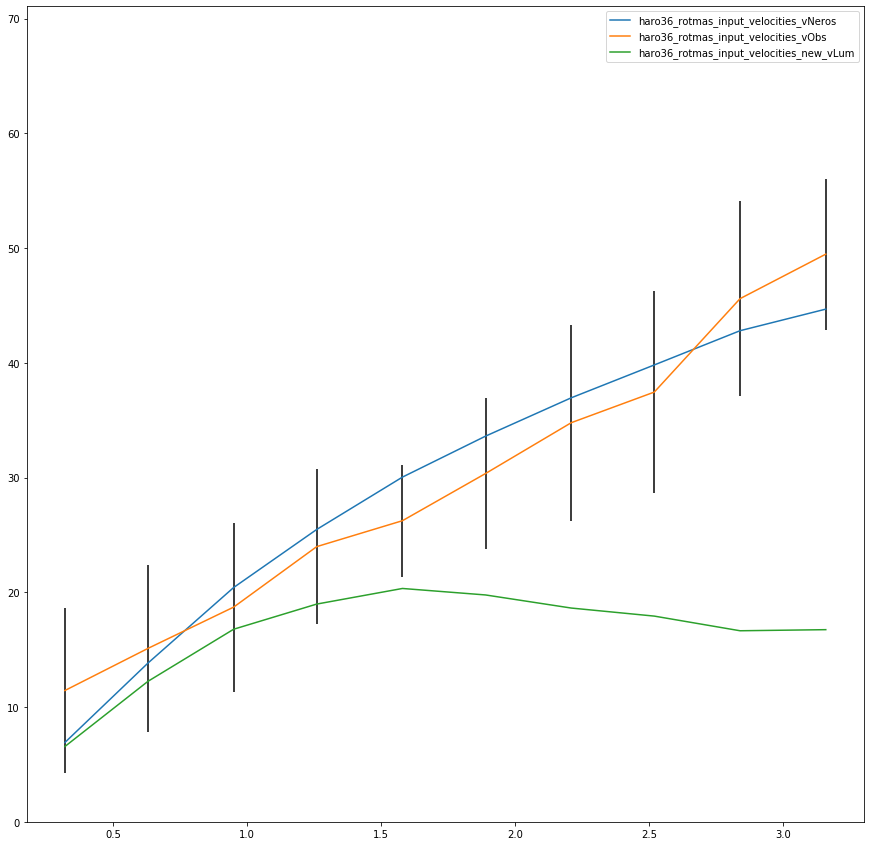

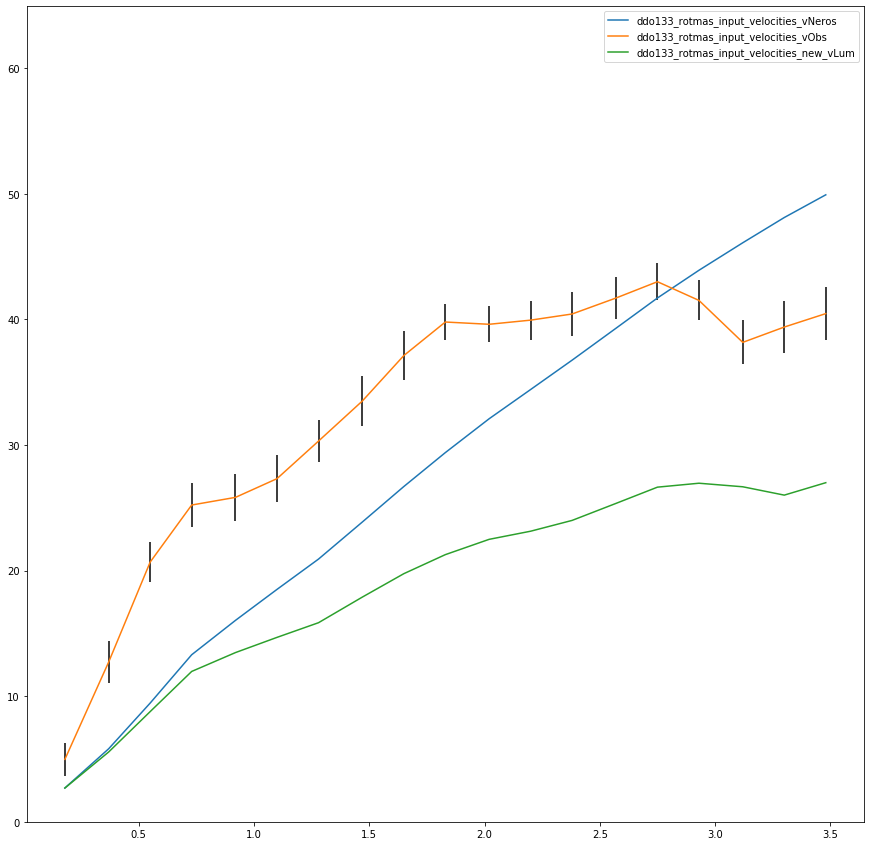

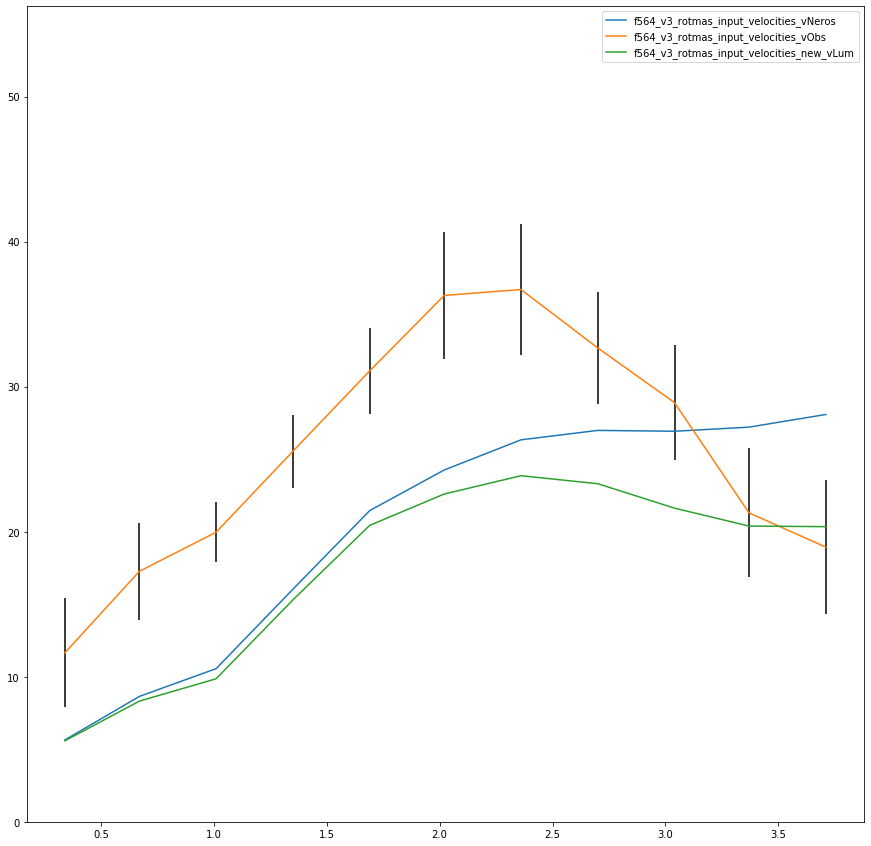

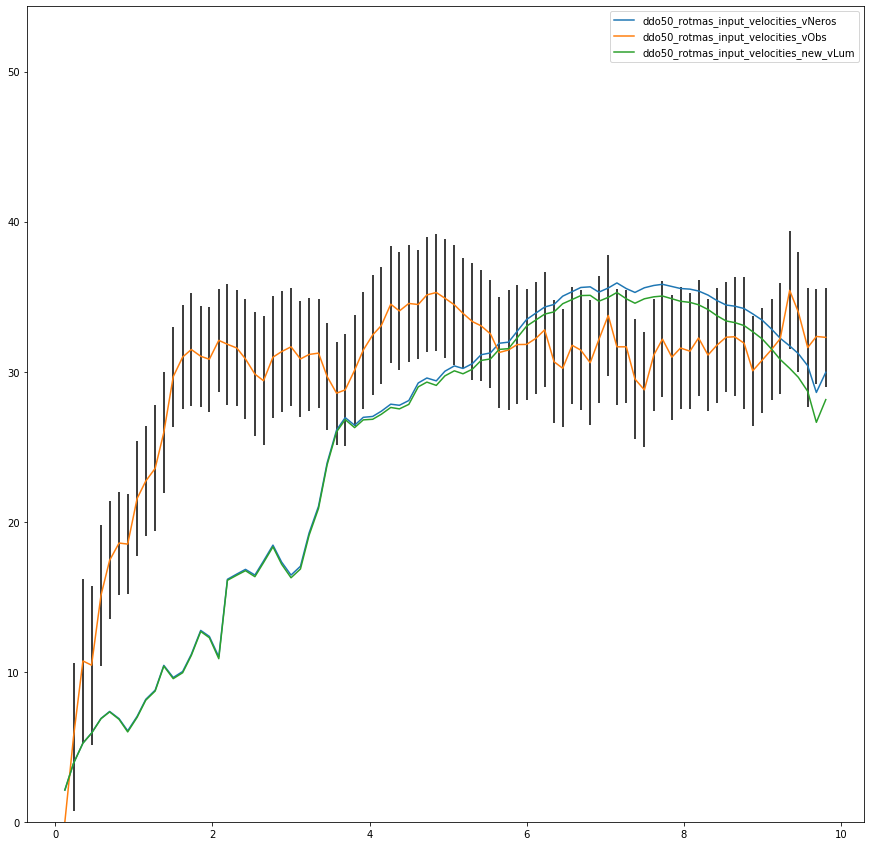

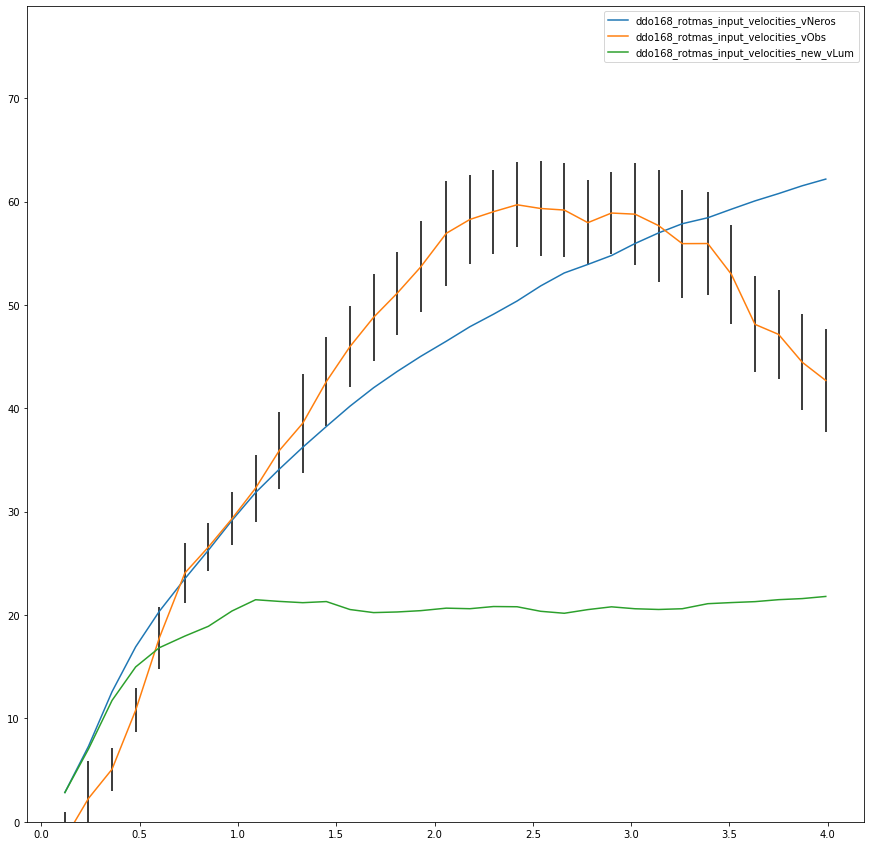

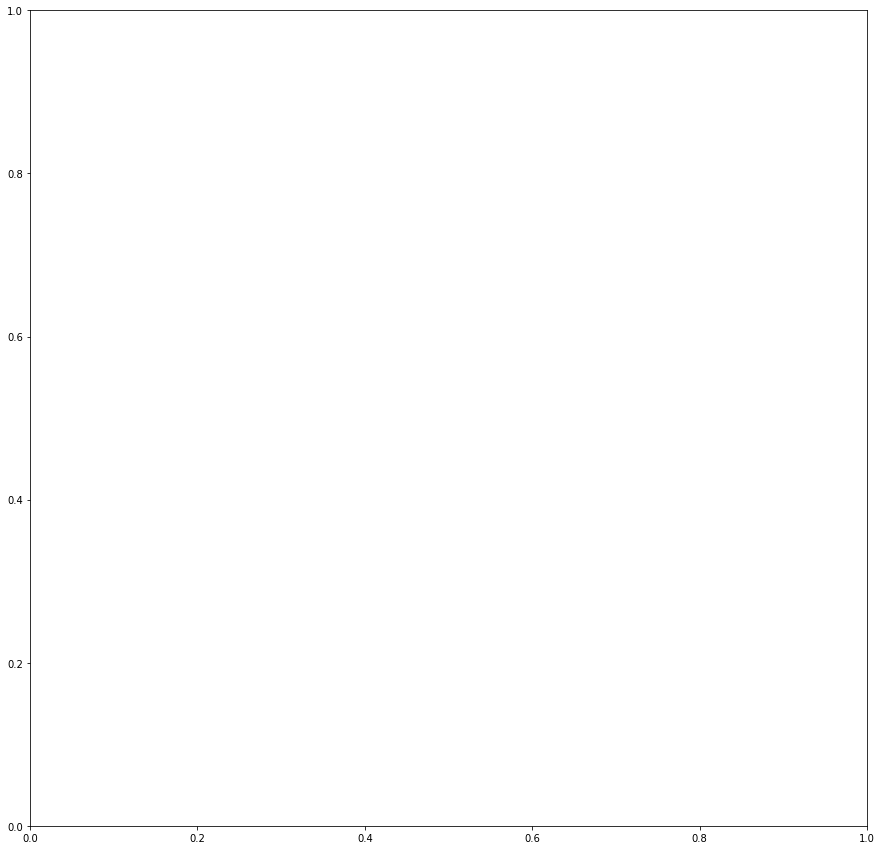

In [20]:
# This is where the fitted alpha & vlum free parameter will be written for each galaxy
out_file = "imported-data/data.csv"
with open(out_file, 'w') as f:
    f.write('{0},{1},{2}\n'.format("Galaxy", "Alpha", "Beta"))
f.close()

vLcmList = []

avgChiSquared = 0.0
avgPhiZero = 0.0

# Change this and uncomment if statement below if just one galaxy is desired.
galaxyWeWant = " "

for galaxyName in littleDataGalaxies:
    # Uncomment the following two lines to produce data and graphs for just galaxyWeWant
    #if (galaxyName != galaxyWeWant):
     #  continue
    
    # data on this galaxy
    f, ax = plt.subplots(1, figsize = (15, 15))
    galaxy = np.array(littleDataGalaxies[galaxyName])
    galaxy_rad = galaxy[:,0]
    galaxy_vObs = galaxy[:,1]
    galaxy_error = galaxy[:,2]
    galaxy_gas = galaxy[:,3]
    galaxy_disk = galaxy[:,4]
    galaxy_bulge = galaxy[:,5]
    galaxy_vLumSquared = Neros.vLumSquared(galaxy_gas, galaxy_disk, galaxy_bulge)
    galaxy_vLum = np.sqrt(galaxy_vLumSquared)
    
    # Make sure the arrays are matching lengths
    maxMWRad = MW_rad[len(MW_rad)-1]
    for i in range(len(galaxy_rad)):
        if galaxy_rad[i] > maxMWRad:
            galaxy_rad = galaxy_rad[:i]
            galaxy_vLum = galaxy_vLum[:i]
            galaxy_vObs = galaxy_vObs[:i]
            break
    
    # fitter
    vals, cov = curve_fit(simple,(galaxy_rad, galaxy_vLum),galaxy_vObs)
    fittedAlpha, fittedVLumFreeParam, fittedPhiZero = vals

    avgPhiZero = avgPhiZero + fittedPhiZero
    
    # Run vLCM
    vLcm = Neros.vLcm(galaxy_rad, MW_vLum_interp_func(galaxy_rad), galaxy_vLum, fittedPhiZero)
    vLcmList.append(vLcm)
    vNeros = simple((galaxy_rad, galaxy_vLum), fittedAlpha, fittedVLumFreeParam, fittedPhiZero)
    ratio = vNeros/galaxy_vObs
    
    # printing to file & console
    chiSquare = chiSquared(galaxy_vObs, vNeros, galaxy_error)
    avgChiSquared = avgChiSquared + chiSquare
    print(f"galaxyName is: {galaxyName}")
    
    print(f"chiSquare is: {chiSquare}")
    
    print(f"fittedAlpha is: {fittedAlpha}, \nfittedVLumFreeParam is: {fittedVLumFreeParam}")
    
    print(f"MW_Phi is: {Neros.phi(galaxy_rad, MW_vLum_interp_func(galaxy_rad))}")
    
    print(f"Other_Phi is: {Neros.phi(galaxy_rad, galaxy_vLum)}")
    
    print("--------------------------")
    
    # Write galaxyName, fittedAlpha, fittedVLumFreeParam to file
    with open(out_file, 'a') as f:
        f.write('{0},{1},{2}\n'.format(galaxyName, fittedAlpha, fittedVLumFreeParam))
    f.close()
    
    # Calculate galaxy_vObs plus error and put into list
    galaxy_vObs_err_incl = []
    for i in range(len(galaxy_vObs)):
        galaxy_vObs_err_incl.append(galaxy_vObs[i] + galaxy_error[i])
        
    # calculate new vLum
    galaxy_vLum_updated = []
    for i in range(len(galaxy_vLum)):
        galaxy_vLum_updated.append(galaxy_vLum[i] * fittedVLumFreeParam)
        
    # plot
    # y-axis scales to the maximum velocity value in the list galaxy_vObs_err_incl
    # or to the maximum value in the list vNeros, whichever is the bigger number
    y_max = max(max(galaxy_vObs_err_incl), max(vNeros))
    ax.set_ylim(bottom = 0, top = y_max + 15)
    
    # plot vObs and vNeros and updated vLum
    ax.plot(galaxy_rad, vNeros, label="{}_vNeros".format(galaxyName))
    ax.plot(galaxy_rad, galaxy_vObs, label="{}_vObs".format(galaxyName))
    ax.plot(galaxy_rad, galaxy_vLum_updated, label="{}_new_vLum".format(galaxyName))
    
    # error bar in vObs
    for i in range(len(galaxy_rad)):
        ax.vlines(galaxy_rad[i], galaxy_vObs[i] - galaxy_error[i], galaxy_vObs[i] + galaxy_error[i])
        
    ax.legend(loc="upper right")

    graph_file_name = "graphs/" + str(galaxyName)

    plt.savefig(graph_file_name)

print(avgChiSquared / len(littleDataGalaxies))
print(avgPhiZero / len(littleDataGalaxies))
#print Neros.kappa(MW_phi, Other_phi, phiZero)

    

In [ ]:
!ls -la data/McGaugh/


In [ ]:
!rm data/McGaugh/.DS_Store
